In [1]:
#!/usr/bin/env python
# -*- coding: utf-8 -*-
#
# @Author: Mingyeong Yang (ggong@kasi.re.kr)
# @Date: 2023-09-25
# @Filename: 230925_class.ipynb

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import glob
import os
import sys

In [3]:
class handling_txts:
    """handling the txt file"""

    def __init__(self, file_name: str):
        self.file_name = file_name
        self.file = open(file_name, 'r')
        #print(self.file_name)

    def rd_savetolist(self):

        self.value_list = []
        while True:
            line = self.file.readline()
            line = line.strip()
            #print(line)
            if not line: break
            val = float(line)
            self.value_list.append(val)

        return self.value_list

    def rd_savetolist_abc(self):

        self.first_list = []
        self.second_list = []
        while True:
            line = self.file.readline()
            line = line.strip()
            #print(line)
            if not line: break
            item = line.split(" ")
            first_val = float(item[0])
            self.first_list.append(first_val)
            second_val = float(item[1])
            self.second_list.append(second_val)

        return self.first_list, self.second_list

    def rd_ln(self):

        list_len = len(self.value_list)
        return list_len

    def hist(self, color:str, bin=100):
        plt.figure()
        hist_data = plt.hist(self.value_list, bins=bin, color=color)
        plt.legend(loc='upper left')
        plt.title(f"Histogram by {self.file_name} bins={bin}")
        plt.show()
        
        return hist_data


In [4]:
# Then calculate the following for each dataset:

"""
1. Mean
2. Geometric mean (can you?!)
3. Median
4. Mode
5. Variance
6. Standard deviation
7. Skewness
8. Kurtosis
"""

class Cal_sample_statistic:
    """calculate sample statistic 
    
    1. Mean
    2. Geometric mean (can you?!)
    3. Median
    4. Mode
    5. Variance
    6. Standard deviation
    7. Skewness
    8. Kurtosis
    
    """

    def __init__(self, data: list):
        self.data = data
        self.num = len(data)

    def mean(self):
        # mean = sum / num
        sum = 0
        for i in self.data:
            sum = sum + i
        self.num = len(self.data)

        self.mean_val = sum / self.num
        
        return self.mean_val
    
    def geo_mean(self):
        # geo_mean = multip**(1/num)
        multip = 1
        for i in self.data:
            multip = multip*i

        self.geo_mean = multip**(1/self.num)

        return self.geo_mean
    
    def median(self):
        sortlist = sorted(self.data)
        flag = self.num%2
        half = int(self.num/2)
        print(flag)
        if flag == 0:
            fir_term = half - 1
            sec_term = half
            self.median = (sortlist[fir_term] + sortlist[sec_term]) / 2
        else:
            fir_term = (self.num - 1)/2
            print(fir_term)
            self.median = sortlist[fir_term]

        return self.median
    
    def mode(self):
        # mode
        count_dic = {}
        for i in self.data:
            index = 0
            for j in self.data:
                if i==j:
                    index += 1
                else:
                    pass
            
            count_dic[i] = index
        sort_dic = sorted(count_dic.items(), key=lambda x:(-x[1], x[0]))
        mode_tup = sort_dic[0]

        frequency = mode_tup[1]

        if frequency==1:
            self.mode="Not exist"
        else:
            self.mode = mode_tup[0]

        return self.mode


    def variance(self):
        # sum((val - self.mean)**2)/self.num
        sum = 0
        meanval= self.mean()
        for i in self.data:
            comp = (i - meanval)**2
            sum = sum + comp
        
        self.varianceval = sum / self.num
        return self.varianceval

    def StandardDeviation(self):
        # variance**(1/2)
        val=self.variance()
        self.StandardDeviation_val = val**(1/2)
        return self.StandardDeviation_val

    def skewness(self):
        # sum((val - self.mean)**3)/self.num
        # StandardDeviation**(3)
        sum = 0
        meanval= self.mean()
        for i in self.data:
            comp = (i - meanval)**3
            sum = sum + comp
        
        top_comp = sum / self.num
        val = self.StandardDeviation()
        under_comp = val**3
        self.skewness = top_comp / under_comp

        return self.skewness

    def kurtosis(self):
        # sum((val - self.mean)**4)/self.num
        # StandardDeviation**4
        
        sum = 0
        meanval= self.mean()
        for i in self.data:
            comp = (i - meanval)**4
            sum = sum + comp
        
        top_comp = sum / self.num
        val = self.StandardDeviation()
        under_comp = val**4
        self.kurtosis = top_comp / under_comp

        return self.kurtosis




In [5]:
# call the mock datas

mk1 = handling_txts("mock_data_1.txt")
mk2 = handling_txts("mock_data_2.txt")
mk3 = handling_txts("mock_data_3.txt")
mk4 = handling_txts("mock_data_4.txt")
mk5 = handling_txts("mock_data_5.txt")
mk6 = handling_txts("mock_data_6.txt")


mk1_list = mk1.rd_savetolist()
mk2_list = mk2.rd_savetolist()
mk3_list = mk3.rd_savetolist()
mk4_list = mk4.rd_savetolist()
mk5_list = mk5.rd_savetolist()
mk6_list = mk6.rd_savetolist()

In [6]:
print(mk1.rd_ln())
print(mk2.rd_ln())
print(mk3.rd_ln())
print(mk4.rd_ln())
print(mk5.rd_ln())
print(mk6.rd_ln())

10000
10000
10000
10000
10000
10000


In [7]:
"""mk1.hist(bin=10, color='k')
mk1.hist(bin=100,color='k')
mk1.hist(bin=1000, color='k')"""

"mk1.hist(bin=10, color='k')\nmk1.hist(bin=100,color='k')\nmk1.hist(bin=1000, color='k')"

In [8]:
"""mk2.hist(bin=10, color='r')
mk2.hist(bin=100, color='r')
mk2.hist(bin=1000, color='r')"""

"mk2.hist(bin=10, color='r')\nmk2.hist(bin=100, color='r')\nmk2.hist(bin=1000, color='r')"

In [9]:
"""mk3.hist(bin=10, color='g')
mk3.hist(bin=100, color='g')
mk3.hist(bin=1000, color='g')"""

"mk3.hist(bin=10, color='g')\nmk3.hist(bin=100, color='g')\nmk3.hist(bin=1000, color='g')"

In [10]:
"""mk4.hist(bin=10, color='b')
mk4.hist(bin=100, color='b')
mk4.hist(bin=1000, color='b')"""

"mk4.hist(bin=10, color='b')\nmk4.hist(bin=100, color='b')\nmk4.hist(bin=1000, color='b')"

In [11]:
"""mk5.hist(bin=10, color='c')
mk5.hist(bin=100, color='c')
mk5.hist(bin=1000, color='c')"""

"mk5.hist(bin=10, color='c')\nmk5.hist(bin=100, color='c')\nmk5.hist(bin=1000, color='c')"

In [12]:
"""mk6.hist(bin=10, color='m')
mk6.hist(bin=100, color='m')
mk6.hist(bin=1000, color='m')"""

"mk6.hist(bin=10, color='m')\nmk6.hist(bin=100, color='m')\nmk6.hist(bin=1000, color='m')"

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


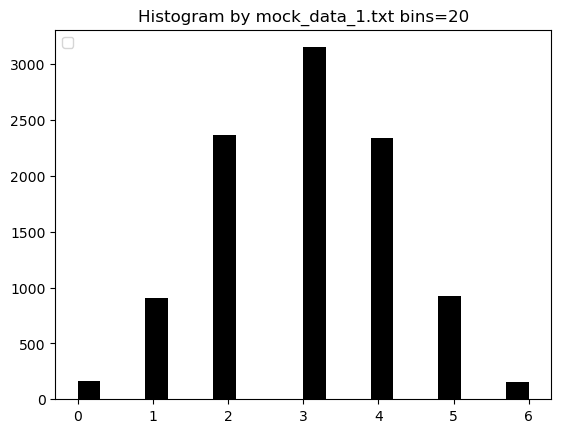

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


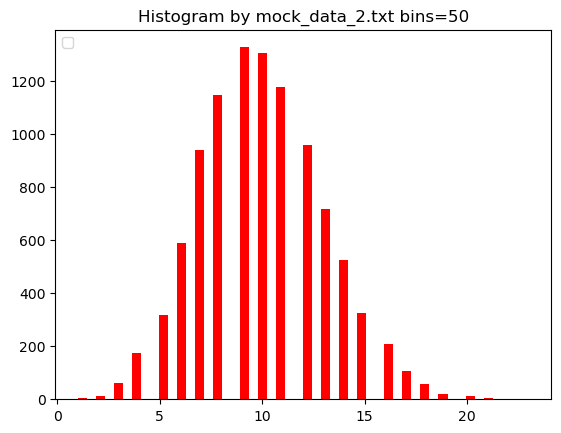

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


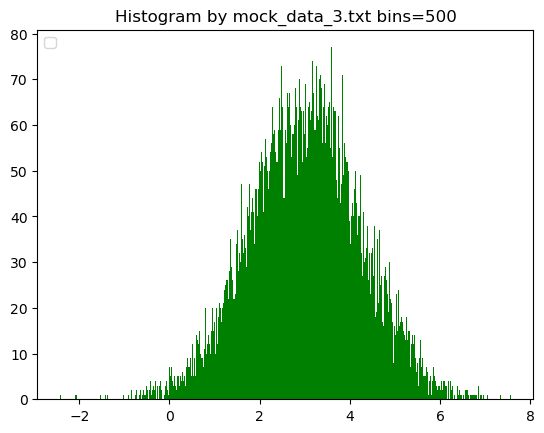

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


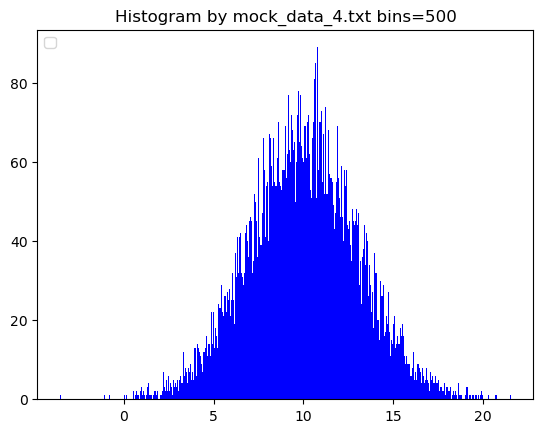

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


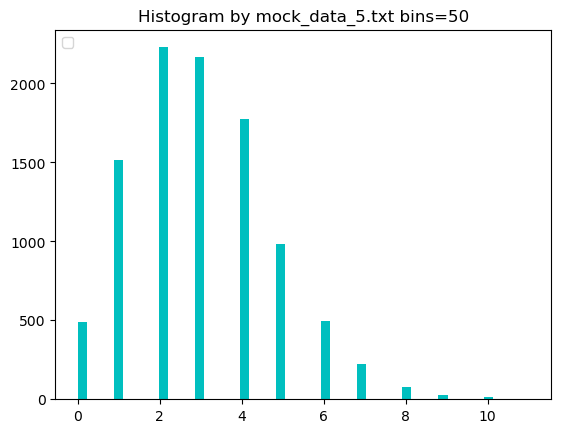

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


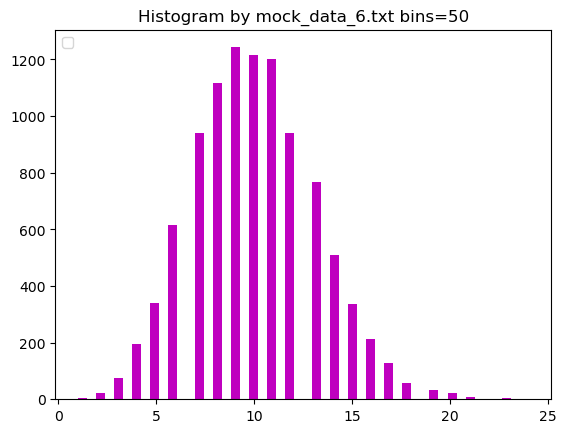

(array([3.000e+00, 0.000e+00, 2.200e+01, 0.000e+00, 7.500e+01, 0.000e+00,
        1.960e+02, 0.000e+00, 3.410e+02, 0.000e+00, 6.150e+02, 0.000e+00,
        0.000e+00, 9.420e+02, 0.000e+00, 1.118e+03, 0.000e+00, 1.243e+03,
        0.000e+00, 1.215e+03, 0.000e+00, 1.203e+03, 0.000e+00, 9.390e+02,
        0.000e+00, 0.000e+00, 7.690e+02, 0.000e+00, 5.080e+02, 0.000e+00,
        3.370e+02, 0.000e+00, 2.140e+02, 0.000e+00, 1.280e+02, 0.000e+00,
        5.900e+01, 0.000e+00, 0.000e+00, 3.400e+01, 0.000e+00, 2.200e+01,
        0.000e+00, 9.000e+00, 0.000e+00, 2.000e+00, 0.000e+00, 5.000e+00,
        0.000e+00, 1.000e+00]),
 array([ 1.  ,  1.46,  1.92,  2.38,  2.84,  3.3 ,  3.76,  4.22,  4.68,
         5.14,  5.6 ,  6.06,  6.52,  6.98,  7.44,  7.9 ,  8.36,  8.82,
         9.28,  9.74, 10.2 , 10.66, 11.12, 11.58, 12.04, 12.5 , 12.96,
        13.42, 13.88, 14.34, 14.8 , 15.26, 15.72, 16.18, 16.64, 17.1 ,
        17.56, 18.02, 18.48, 18.94, 19.4 , 19.86, 20.32, 20.78, 21.24,
        21.7 , 22.16,

In [13]:
mk1.hist(bin=20, color='k')
mk2.hist(bin=50, color='r')
mk3.hist(bin=500, color='g')
mk4.hist(bin=500, color='b')
mk5.hist(bin=50, color='c')
mk6.hist(bin=50, color='m')

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


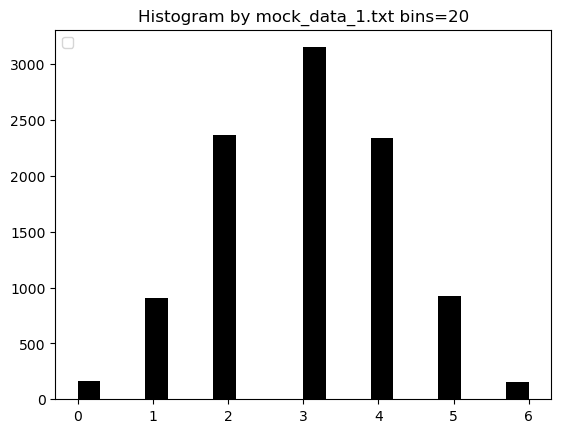

(array([ 168.,    0.,    0.,  902.,    0.,    0., 2364.,    0.,    0.,
          0., 3150.,    0.,    0., 2339.,    0.,    0.,  924.,    0.,
          0.,  153.]), array([0. , 0.3, 0.6, 0.9, 1.2, 1.5, 1.8, 2.1, 2.4, 2.7, 3. , 3.3, 3.6,
       3.9, 4.2, 4.5, 4.8, 5.1, 5.4, 5.7, 6. ]), <BarContainer object of 20 artists>)
<class 'numpy.ndarray'>


In [14]:
test_hist = mk1.hist(bin=20, color='k')
print(test_hist)
print(type(test_hist[1]))

# y축 test_hist[0]
# x축 test_hist[1]

In [15]:
from scipy.optimize import curve_fit

class gaussian:
    """주어진 데이터를 gaussian 분포로 plot"""
    def __init__(self, data):
        self.data = data

    def gauss(self, x, a, mu, sigma):
        #a = 1 / (sigma*np.sqrt(2*np.pi))
        T = (x - mu) / sigma
        expo = np.exp(-(T**2)/2)
        y = a*expo
        return y

    
    def fit_parameter(self, hist_data, mu, sigma):
        data = hist_data
        x = data[1]
        y = data[0]
        #x = x[:-1]
        y = np.append(y, 0)
        a = max(y)
        print(a, mu, sigma)
        mu = mu
        sigma = sigma
        opt, cov = curve_fit(self.gauss, x, y, p0=[a, mu, sigma])

        return opt, cov





No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


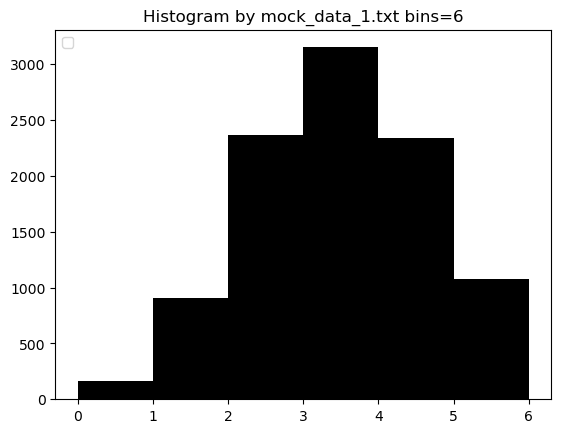

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


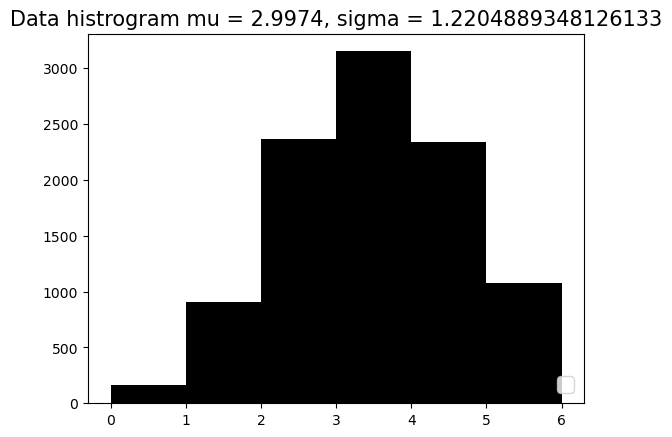

mean: 2.9974
variance: 1.4895932400000274
sigma: 1.2204889348126133
skewness: -0.007580259668532239
kurtosis: 2.700359911030378


In [29]:
mk1_cal = Cal_sample_statistic(mk1_list)
mu = mk1_cal.mean()
var = mk1_cal.variance()
sigma = mk1_cal.StandardDeviation()
skew = mk1_cal.skewness()
krut = mk1_cal.kurtosis()
mk1_hist = mk1.hist(bin=6, color='k')

plt.figure()
plt.hist(mk1_list, bins=6, color="k")
plt.title(f'Data histrogram mu = {mu}, sigma = {sigma}', fontsize=15)
plt.legend(loc='lower right', fontsize=15)
plt.show()

print(f"mean: {mu}")
print(f"variance: {var}")
print(f"sigma: {sigma}")
print(f"skewness: {skew}")
print(f"kurtosis: {krut}")

In [35]:
print(len(mk1_list))

10000


In [30]:
mk2_cal = Cal_sample_statistic(mk2_list)
mu = mk2_cal.mean()
var = mk2_cal.variance()
sigma = mk2_cal.StandardDeviation()
skew = mk2_cal.skewness()
krut = mk2_cal.kurtosis()

print(f"mean: {mu}")
print(f"variance: {var}")
print(f"sigma: {sigma}")
print(f"skewness: {skew}")
print(f"kurtosis: {krut}")

mean: 9.9796
variance: 9.051183840000164
sigma: 3.0085185457298023
skewness: 0.27205886498457466
kurtosis: 2.9861741651309344


In [31]:
mk3_cal = Cal_sample_statistic(mk3_list)
mu = mk3_cal.mean()
var = mk3_cal.variance()
sigma = mk3_cal.StandardDeviation()
skew = mk3_cal.skewness()
krut = mk3_cal.kurtosis()

print(f"mean: {mu}")
print(f"variance: {var}")
print(f"sigma: {sigma}")
print(f"skewness: {skew}")
print(f"kurtosis: {krut}")

mean: 3.0071696146999463
variance: 1.5297783821647475
sigma: 1.2368421007407322
skewness: -0.027915247484694903
kurtosis: 3.0571697317007396


In [32]:
mk4_cal = Cal_sample_statistic(mk4_list)
mu = mk4_cal.mean()
var = mk4_cal.variance()
sigma = mk4_cal.StandardDeviation()
skew = mk4_cal.skewness()
krut = mk4_cal.kurtosis()

print(f"mean: {mu}")
print(f"variance: {var}")
print(f"sigma: {sigma}")
print(f"skewness: {skew}")
print(f"kurtosis: {krut}")

mean: 10.0122697691655
variance: 9.20384118425951
sigma: 3.0337833120148034
skewness: 0.006159587863107182
kurtosis: 3.062575878556151


In [33]:
mk5_cal = Cal_sample_statistic(mk5_list)
mu = mk5_cal.mean()
var = mk5_cal.variance()
sigma = mk5_cal.StandardDeviation()
skew = mk5_cal.skewness()
krut = mk5_cal.kurtosis()

print(f"mean: {mu}")
print(f"variance: {var}")
print(f"sigma: {sigma}")
print(f"skewness: {skew}")
print(f"kurtosis: {krut}")

mean: 3.0048
variance: 3.012776960000062
sigma: 1.735735279355715
skewness: 0.5846608959728767
kurtosis: 3.371672483690904


In [34]:
mk6_cal = Cal_sample_statistic(mk6_list)
mu = mk6_cal.mean()
var = mk6_cal.variance()
sigma = mk6_cal.StandardDeviation()
skew = mk6_cal.skewness()
krut = mk6_cal.kurtosis()

print(f"mean: {mu}")
print(f"variance: {var}")
print(f"sigma: {sigma}")
print(f"skewness: {skew}")
print(f"kurtosis: {krut}")

mean: 10.0111
variance: 9.849576789999995
sigma: 3.138403541611562
skewness: 0.31703948723652403
kurtosis: 3.1423461861501227


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


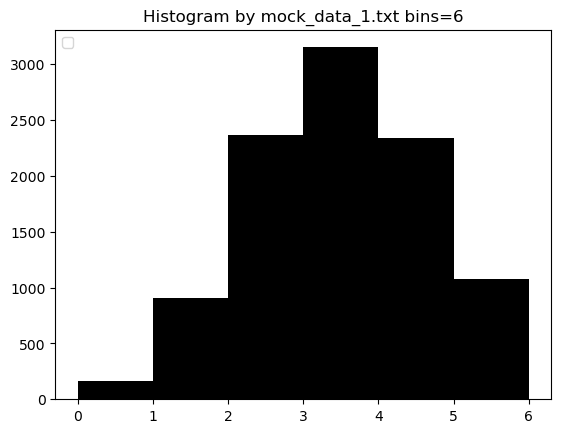

3150.0 2.9974 1.2204889348126133


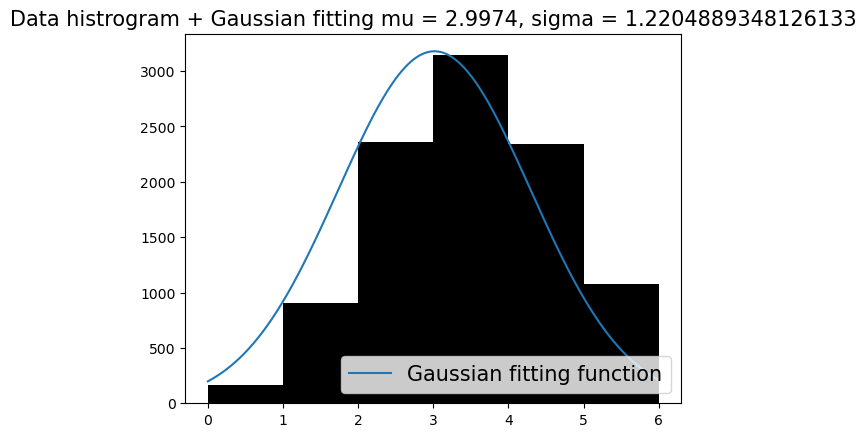

In [17]:
mk1_cal = Cal_sample_statistic(mk1_list)
mu = mk1_cal.mean()
sigma = mk1_cal.StandardDeviation()
mk1_hist = mk1.hist(bin=6, color='k')

mk1_gaussian = gaussian(data=mk1_list)
opt, cov = mk1_gaussian.fit_parameter(mk1_hist, mu, sigma)
x = mk1_hist[1]


x_fit=np.linspace(min(x), max(x), 1000)
y_fit=mk1_gaussian.gauss(x_fit, opt[0], opt[1], opt[2])

plt.figure()
plt.hist(mk1_list, bins=6, color="k")
plt.plot(x_fit, y_fit, label= 'Gaussian fitting function')
plt.title(f'Data histrogram + Gaussian fitting mu = {mu}, sigma = {sigma}', fontsize=15)
plt.legend(loc='lower right', fontsize=15)
plt.show()


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


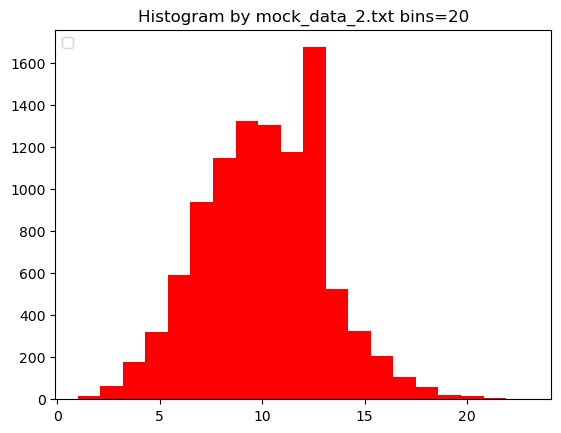

1676.0 9.9796 3.0085185457298023


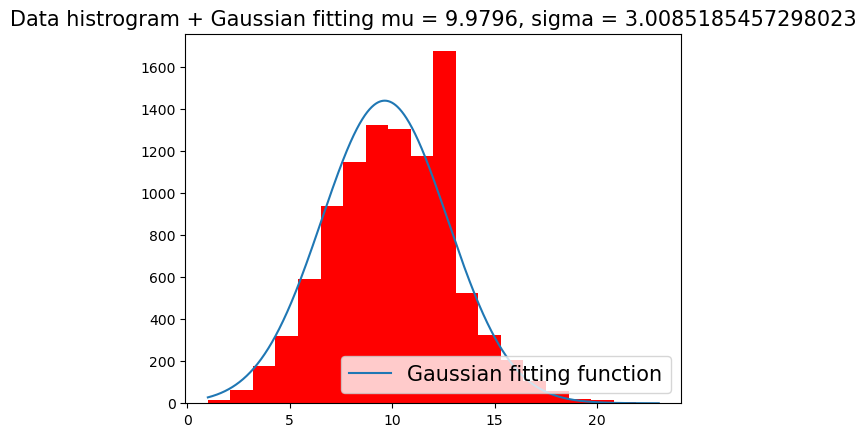

In [18]:
mk2_cal = Cal_sample_statistic(mk2_list)
mu = mk2_cal.mean()
sigma = mk2_cal.StandardDeviation()
mk2_hist = mk2.hist(bin=20, color='r')

mk2_gaussian = gaussian(data=mk2_list)
opt, cov = mk1_gaussian.fit_parameter(mk2_hist, mu, sigma)
x = mk2_hist[1]


x_fit=np.linspace(min(x), max(x), 1000)
y_fit=mk1_gaussian.gauss(x_fit, opt[0], opt[1], opt[2])

plt.figure()
plt.hist(mk2_list, bins=20, color="r")
plt.plot(x_fit, y_fit, label= 'Gaussian fitting function')
plt.title(f'Data histrogram + Gaussian fitting mu = {mu}, sigma = {sigma}', fontsize=15)
plt.legend(loc='lower right', fontsize=15)
plt.show()


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


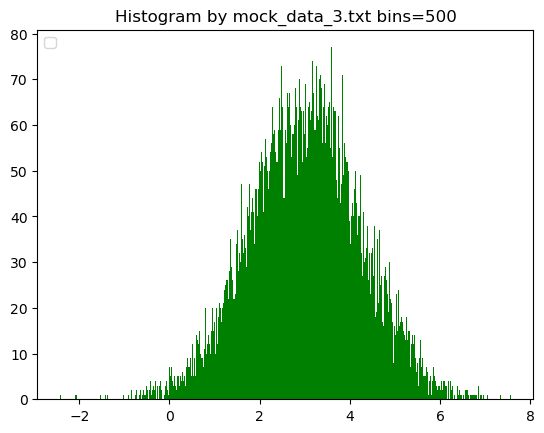

77.0 3.0071696146999463 1.2368421007407322


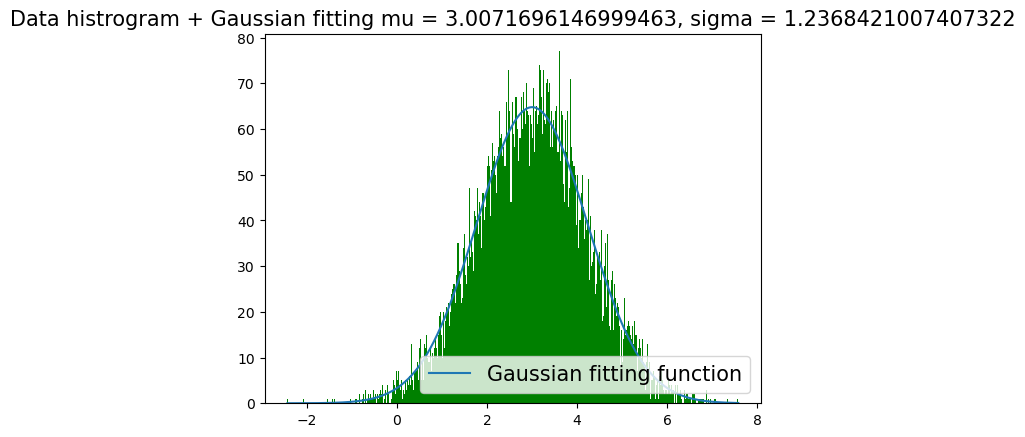

In [19]:
mk3_cal = Cal_sample_statistic(mk3_list)
mu = mk3_cal.mean()
sigma = mk3_cal.StandardDeviation()
mk3_hist = mk3.hist(bin=500, color='g')

mk3_gaussian = gaussian(data=mk3_list)
opt, cov = mk1_gaussian.fit_parameter(mk3_hist, mu, sigma)
x = mk3_hist[1]

x_fit=np.linspace(min(x), max(x), 1000)
y_fit=mk3_gaussian.gauss(x_fit, opt[0], opt[1], opt[2])

plt.figure()
plt.hist(mk3_list, bins=500, color="g")
plt.plot(x_fit, y_fit, label= 'Gaussian fitting function')
plt.title(f'Data histrogram + Gaussian fitting mu = {mu}, sigma = {sigma}', fontsize=15)
plt.legend(loc='lower right', fontsize=15)
plt.show()


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


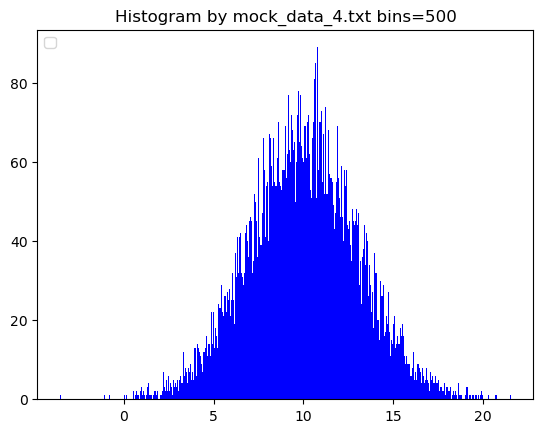

89.0 10.0122697691655 3.0337833120148034


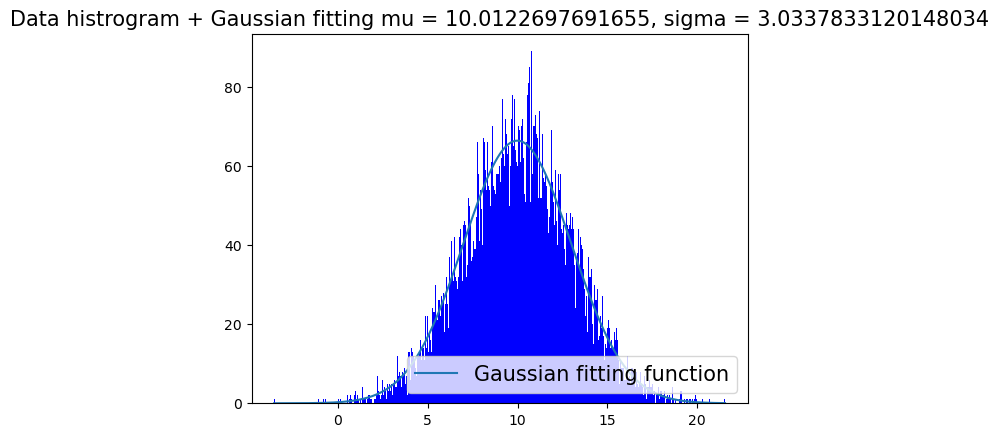

In [20]:
mk4_cal = Cal_sample_statistic(mk4_list)
mu = mk4_cal.mean()
sigma = mk4_cal.StandardDeviation()
mk4_hist = mk4.hist(bin=500, color='b')

mk4_gaussian = gaussian(data=mk4_list)
opt, cov = mk4_gaussian.fit_parameter(mk4_hist, mu, sigma)
x = mk4_hist[1]

x_fit=np.linspace(min(x), max(x), 1000)
y_fit=mk4_gaussian.gauss(x_fit, opt[0], opt[1], opt[2])

plt.figure()
plt.hist(mk4_list, bins=500, color="b")
plt.plot(x_fit, y_fit, label= 'Gaussian fitting function')
plt.title(f'Data histrogram + Gaussian fitting mu = {mu}, sigma = {sigma}', fontsize=15)
plt.legend(loc='lower right', fontsize=15)
plt.show()


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


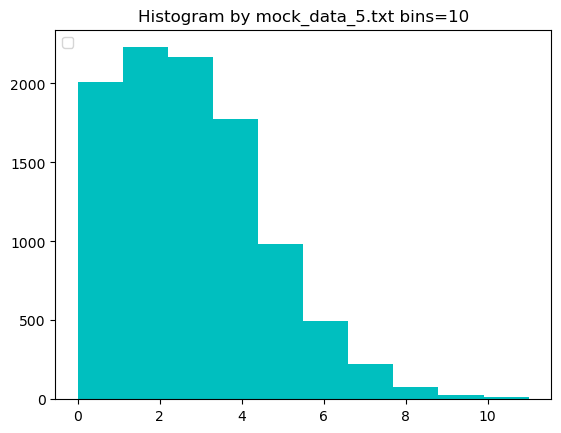

2229.0 3.0048 1.735735279355715


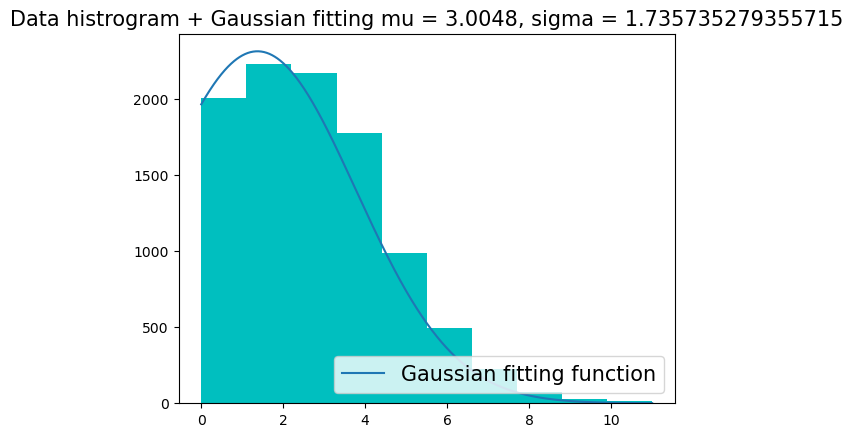

In [21]:
mk5_cal = Cal_sample_statistic(mk5_list)
mu = mk5_cal.mean()
sigma = mk5_cal.StandardDeviation()
mk5_hist = mk5.hist(bin=10, color='c')

mk5_gaussian = gaussian(data=mk5_list)
opt, cov = mk5_gaussian.fit_parameter(mk5_hist, mu, sigma)
x = mk5_hist[1]

x_fit=np.linspace(min(x), max(x), 1000)
y_fit=mk5_gaussian.gauss(x_fit, opt[0], opt[1], opt[2])

plt.figure()
plt.hist(mk5_list, bins=10, color="c")
plt.plot(x_fit, y_fit, label= 'Gaussian fitting function')
plt.title(f'Data histrogram + Gaussian fitting mu = {mu}, sigma = {sigma}', fontsize=15)
plt.legend(loc='lower right', fontsize=15)
plt.show()


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


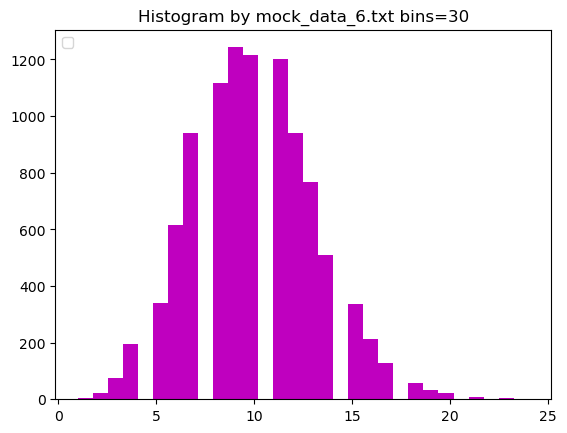

1243.0 10.0111 3.138403541611562


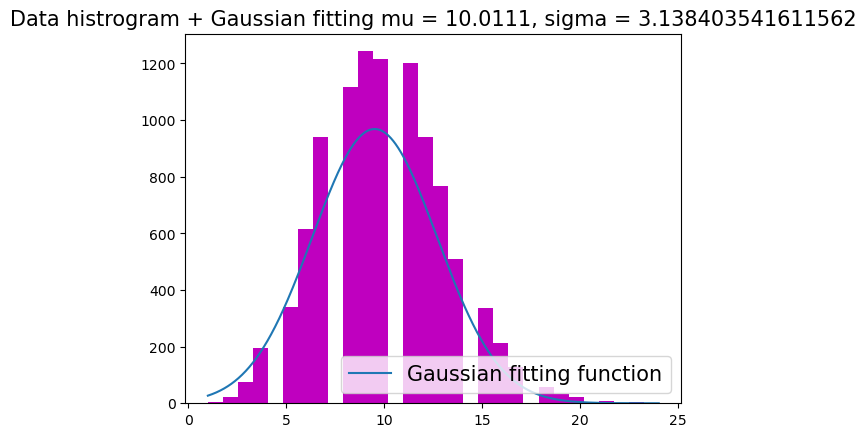

In [22]:
mk6_cal = Cal_sample_statistic(mk6_list)
mu = mk6_cal.mean()
sigma = mk6_cal.StandardDeviation()
mk6_hist = mk6.hist(bin=30, color='m')

mk6_gaussian = gaussian(data=mk6_list)
opt, cov = mk5_gaussian.fit_parameter(mk6_hist, mu, sigma)
x = mk6_hist[1]

x_fit=np.linspace(min(x), max(x), 1000)
y_fit=mk6_gaussian.gauss(x_fit, opt[0], opt[1], opt[2])

plt.figure()
plt.hist(mk6_list, bins=30, color="m")
plt.plot(x_fit, y_fit, label= 'Gaussian fitting function')
plt.title(f'Data histrogram + Gaussian fitting mu = {mu}, sigma = {sigma}', fontsize=15)
plt.legend(loc='lower right', fontsize=15)
plt.show()


In [23]:
class correlation():
    def __init__(self, a, b, mean_a, mean_b, standev_a, standev_b):
        self.a = a
        self.b = b
        self.mean_a = mean_a
        self.mean_b = mean_b
        self.standev_a = standev_a
        self.standev_b = standev_b

    def cov(self):
        # sum((val - self.mean)**2)/self.num
        sum = 0
        for i in range(len(self.a)):
            comp = (self.a[i] - self.mean_a)*(self.b[i] - self.mean_b)
            sum = sum + comp
        result = sum/len(self.a)
        return result

    def corr(self):
        cov_val = self.cov()
        corr_val = cov_val/(self.standev_a*self.standev_b)
        return corr_val

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


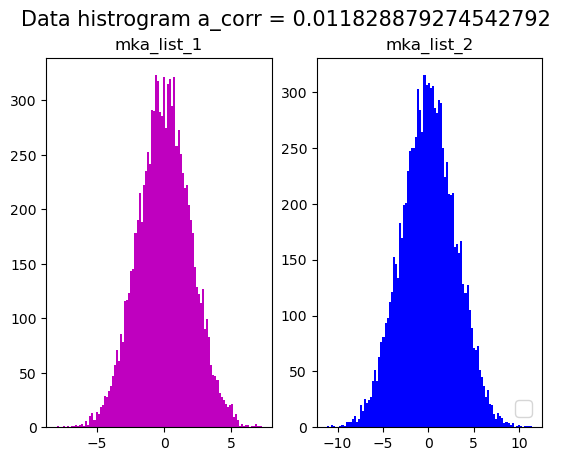

323.0 0.012658290865752991 1.9769046788146833
315.0 0.02810010088078657 3.004196193017099


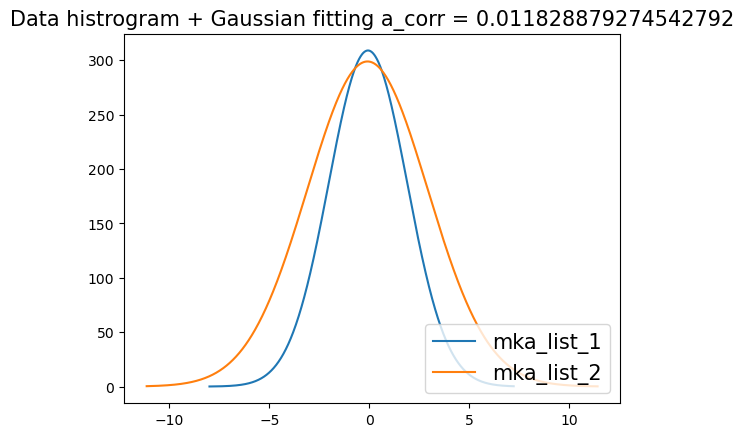

In [24]:
# call the mock datas

mka = handling_txts("mock_data_A.txt")
mkb = handling_txts("mock_data_B.txt")
mkc = handling_txts("mock_data_C.txt")


mka_list_1, mka_list_2 = mka.rd_savetolist_abc()
mkb_list_1, mkb_list_2 = mkb.rd_savetolist_abc()
mkc_list_1, mkc_list_2 = mkc.rd_savetolist_abc()


mka_cal_1 = Cal_sample_statistic(mka_list_1)
a_mu_1 = mka_cal_1.mean()
a_sigma_1 = mka_cal_1.StandardDeviation()

mka_cal_2 = Cal_sample_statistic(mka_list_2)
a_mu_2 = mka_cal_2.mean()
a_sigma_2 = mka_cal_2.StandardDeviation()

a_corr = correlation(mka_list_1, mka_list_2, a_mu_1, a_mu_2, a_sigma_1, a_sigma_2)
a_corr_val = a_corr.corr()

plt.figure()
plt.subplot(1,2,1)
mka_hist_1 = plt.hist(mka_list_1, bins=100, color="m")
plt.title(f'mka_list_1')
plt.subplot(1,2,2)
mka_hist_2=plt.hist(mka_list_2, bins=100, color="b")
plt.title(f'mka_list_2')

plt.suptitle(f'Data histrogram a_corr = {a_corr_val}', fontsize=15)
plt.legend(loc='lower right', fontsize=15)
plt.show()

mka1_gaussian = gaussian(data=mka_list_1)
opt, cov = mka1_gaussian.fit_parameter(mka_hist_1, a_mu_1, a_sigma_1)
x = mka_hist_1[1]

x_fit=np.linspace(min(x), max(x), 1000)
y_fit=mk6_gaussian.gauss(x_fit, opt[0], opt[1], opt[2])

mka2_gaussian = gaussian(data=mka_list_2)
opt, cov = mka2_gaussian.fit_parameter(mka_hist_2, a_mu_2, a_sigma_2)
x2 = mka_hist_2[1]

x_fit2=np.linspace(min(x2), max(x2), 1000)
y_fit2=mka2_gaussian.gauss(x_fit2, opt[0], opt[1], opt[2])

plt.figure()
#plt.hist(mk6_list, bins=30, color="m")
plt.plot(x_fit, y_fit, label= 'mka_list_1')
plt.plot(x_fit2, y_fit2, label= 'mka_list_2')
plt.title(f'Data histrogram + Gaussian fitting a_corr = {a_corr_val}', fontsize=15)
plt.legend(loc='lower right', fontsize=15)
plt.show()

[-1.8434539843241158, 0.3909870612934999, 0.30163998127477276, 1.4836299546336549, -2.157601638726369, 1.5285258340336376, 3.2485363254772306, 1.3434879791656944, -0.1481228610099563, -1.0909419734969599, -0.25636702738751593, 0.32468362666582257, 2.8827593887108813, -0.9771025288286656, 2.540809362099929, 2.968606844301523, -2.7979704559591116, 2.4605142157914575, -1.2038642330254976, -0.6947966509789772, 0.46664627649366636, 1.5298366896496571, -0.5381138086188109, 0.7626473808913208, -0.13654678042163804, -1.5147146544082895, -0.19946269655694038, -2.902550962272099, 3.3696027206141026, -1.8409421077107921, 0.268419624794383, -1.9209062461030175, -3.2615412134013337, -0.17127878114985173, 3.158925551943507, 0.08755748503452469, 1.2519002223035538, 1.023963611637182, 2.5807931467690284, 0.8205227639190974, 1.6105476445414837, 4.585516890221848, -1.142219504470175, -2.461501332009564, -0.766557807338891, 2.1208020256895175, 1.4880997454862874, -1.6639735662581232, -3.126162467189622, 

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


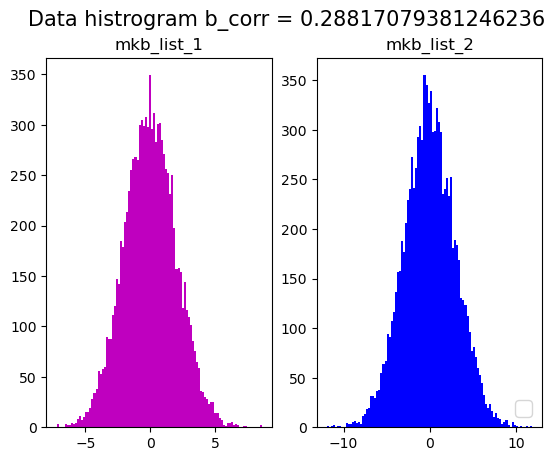

349.0 -0.004475037411406887 2.0052260582006904
355.0 -0.025125474582187543 2.983375232908284


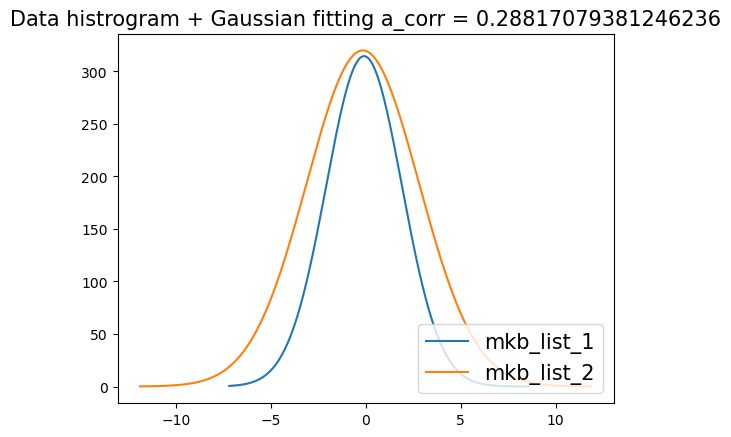

In [25]:
mkb = handling_txts("mock_data_B.txt")
mkb_list_1, mkb_list_2 = mkb.rd_savetolist_abc()
print(mkb_list_1)
print(mkb_list_2)

mkb_cal_1 = Cal_sample_statistic(mkb_list_1)
b_mu_1 = mkb_cal_1.mean()
b_sigma_1 = mkb_cal_1.StandardDeviation()

mkb_cal_2 = Cal_sample_statistic(mkb_list_2)
b_mu_2 = mkb_cal_2.mean()
b_sigma_2 = mkb_cal_2.StandardDeviation()

b_corr = correlation(mkb_list_1, mkb_list_2, b_mu_1, b_mu_2, b_sigma_1, b_sigma_2)
b_corr_val = b_corr.corr()

plt.figure()
plt.subplot(1,2,1)
mkb_hist_1 = plt.hist(mkb_list_1, bins=100, color="m")
plt.title(f'mkb_list_1')
plt.subplot(1,2,2)
mkb_hist_2=plt.hist(mkb_list_2, bins=100, color="b")
plt.title(f'mkb_list_2')

plt.suptitle(f'Data histrogram b_corr = {b_corr_val}', fontsize=15)
plt.legend(loc='lower right', fontsize=15)
plt.show()

mkb1_gaussian = gaussian(data=mkb_list_1)
opt, cov = mkb1_gaussian.fit_parameter(mkb_hist_1, b_mu_1, b_sigma_1)
x = mkb_hist_1[1]

x_fit=np.linspace(min(x), max(x), 1000)
y_fit=mkb1_gaussian.gauss(x_fit, opt[0], opt[1], opt[2])

mkb2_gaussian = gaussian(data=mkb_list_2)
opt, cov = mkb2_gaussian.fit_parameter(mkb_hist_2, b_mu_2, b_sigma_2)
x2 = mkb_hist_2[1]

x_fit2=np.linspace(min(x2), max(x2), 1000)
y_fit2=mkb2_gaussian.gauss(x_fit2, opt[0], opt[1], opt[2])

plt.figure()
#plt.hist(mk6_list, bins=30, color="m")
plt.plot(x_fit, y_fit, label= 'mkb_list_1')
plt.plot(x_fit2, y_fit2, label= 'mkb_list_2')
plt.title(f'Data histrogram + Gaussian fitting a_corr = {b_corr_val}', fontsize=15)
plt.legend(loc='lower right', fontsize=15)
plt.show()

[1.168298225538291, 4.291294669361275, 1.0994469502630113, 1.9829651079675996, -0.6512276258481965, 0.10707736681855101, -1.568332153308172, 0.8768134324290149, -0.1968490833193941, -1.511357115357258, -0.7748355430616767, -2.7404854639299927, 0.5244146100377713, -0.5816674241066422, 1.4384877038110315, 0.42475118601002615, 3.5802832521304526, -0.4590549394466584, -2.111714778277716, 3.4042113233420808, 2.3846527930597996, 1.7703820798194654, 2.157408656304491, -0.6861136593551915, -1.3487394765219807, 0.769153583309518, 0.15163213530876418, -0.43966653932630884, -4.781465114435809, 1.9550167769612923, 2.836999724126934, -1.7089390434937537, 1.960105286573315, -1.1165974420126803, 0.25287979661308957, -0.4744909426155366, -2.623654740336629, -0.9297234378182747, -1.1197271392183041, -1.2268340388228176, -1.772724637322318, -0.004820302129103782, 0.7498929052411518, -0.6792741634531397, 1.975081050271235, -1.7814168329762265, 0.9969520544245735, -1.7774863381031636, 0.3283002333017928, 

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


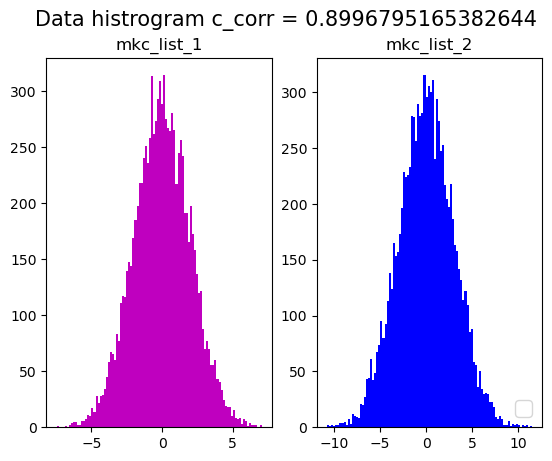

314.0 -0.007701019789627728 2.001079334261149
315.0 0.004544922289695187 3.02270529176272


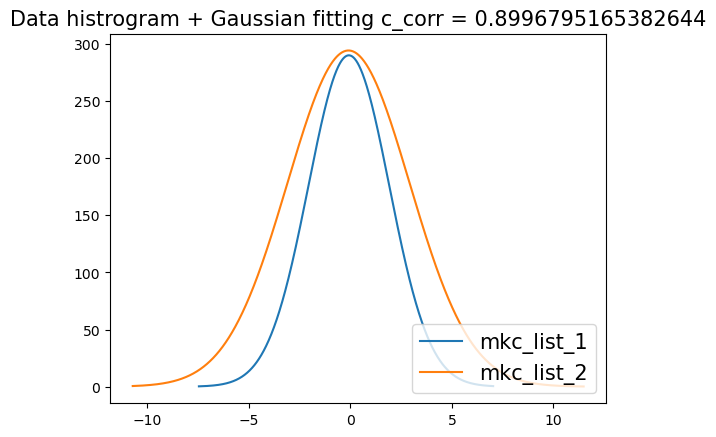

In [26]:
mkc = handling_txts("mock_data_C.txt")
mkc_list_1, mkc_list_2 = mkc.rd_savetolist_abc()
print(mkc_list_1)
print(mkc_list_2)

mkc_cal_1 = Cal_sample_statistic(mkc_list_1)
c_mu_1 = mkc_cal_1.mean()
c_sigma_1 = mkc_cal_1.StandardDeviation()

mkc_cal_2 = Cal_sample_statistic(mkc_list_2)
c_mu_2 = mkc_cal_2.mean()
c_sigma_2 = mkc_cal_2.StandardDeviation()

c_corr = correlation(mkc_list_1, mkc_list_2, c_mu_1, c_mu_2, c_sigma_1, c_sigma_2)
c_corr_val = c_corr.corr()

plt.figure()
plt.subplot(1,2,1)
mkc_hist_1 = plt.hist(mkc_list_1, bins=100, color="m")
plt.title(f'mkc_list_1')
plt.subplot(1,2,2)
mkc_hist_2=plt.hist(mkc_list_2, bins=100, color="b")
plt.title(f'mkc_list_2')

plt.suptitle(f'Data histrogram c_corr = {c_corr_val}', fontsize=15)
plt.legend(loc='lower right', fontsize=15)
plt.show()

mkc1_gaussian = gaussian(data=mkc_list_1)
opt, cov = mkc1_gaussian.fit_parameter(mkc_hist_1, c_mu_1, c_sigma_1)
x = mkc_hist_1[1]

x_fit=np.linspace(min(x), max(x), 1000)
y_fit=mkc1_gaussian.gauss(x_fit, opt[0], opt[1], opt[2])

mkc2_gaussian = gaussian(data=mkc_list_2)
opt, cov = mkc2_gaussian.fit_parameter(mkc_hist_2, c_mu_2, c_sigma_2)
x2 = mkc_hist_2[1]

x_fit2=np.linspace(min(x2), max(x2), 1000)
y_fit2=mkc2_gaussian.gauss(x_fit2, opt[0], opt[1], opt[2])

plt.figure()
#plt.hist(mk6_list, bins=30, color="m")
plt.plot(x_fit, y_fit, label= 'mkc_list_1')
plt.plot(x_fit2, y_fit2, label= 'mkc_list_2')
plt.title(f'Data histrogram + Gaussian fitting c_corr = {c_corr_val}', fontsize=15)
plt.legend(loc='lower right', fontsize=15)
plt.show()

In [27]:
from scipy.optimize import curve_fit
from math import factorial

class poisson:
    """주어진 데이터를 poisson 분포로 plot"""
    def __init__(self, data):
        self.data = data

    def poisson(self, k, mu):
        y = ((mu**k)*np.exp(-mu))/factorial(k)
        return y
    
    def fit_parameter(self, hist_data, k, mu):
        data = hist_data
        x = data[1]
        y = data[0]
        #x = x[:-1]
        #y = np.append(y, 0)
        print(k, mu)
        opt, cov = curve_fit(self.poisson, k, mu)

        return opt, cov




No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


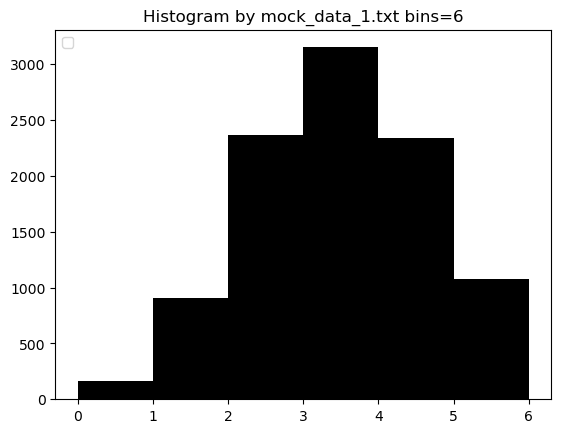

100 2.9974


TypeError: object of type 'numpy.float64' has no len()

In [28]:
mk1_cal = Cal_sample_statistic(mk1_list)
mu = mk1_cal.mean()
sigma = mk1_cal.StandardDeviation()
mk1_hist = mk1.hist(bin=6, color='k')

mk1_poisson = poisson(data=mk1_list)
k = 100
opt, cov = mk1_poisson.fit_parameter(mk1_hist, k, mu)
x = mk1_hist[1]


x_fit=np.linspace(min(x), max(x), 1000)
y_fit=mk1_poisson.poisson(opt[0], opt[1])

plt.figure()
plt.hist(mk1_list, bins=6, color="k")
plt.plot(x_fit, y_fit, label= 'poisson fitting function')
plt.title(f'Data histrogram + poisson fitting k = {k}, mu = {mu}', fontsize=15)
plt.legend(loc='lower right', fontsize=15)
plt.show()


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


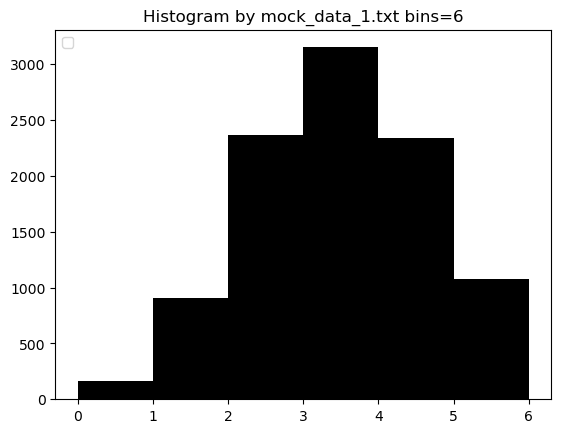

10 1000 0.9


C:\Users\User\AppData\Local\Temp\ipykernel_13392\1599445846.py:11: DeprecationWarning: Using factorial() with floats is deprecated
  nck = factorial(n) / (factorial(k) * factorial(n - k))


TypeError: only integer scalar arrays can be converted to a scalar index

In [ ]:
from scipy.optimize import curve_fit
from math import factorial

class binom_dist:
    """주어진 데이터를 binomial 분포로 plot"""

    def __init__(self, data):
        self.data = data

    def binomial(self, k, n, p):
        nck = factorial(n) / (factorial(k) * factorial(n - k))
        pd = nck * p**k * (1-p)**(n-k)
        return pd
    
    def fit_parameter(self, hist_data, k, n, p):
        data = hist_data
        x = data[1]
        y = data[0]
        # x = x[:-1]
        # y = np.append(y, 0)
        print(k, n, p)
        opt, cov = curve_fit(self.binomial, x, y, p0=[k, n, p])

        return opt, cov

mk1_cal = Cal_sample_statistic(mk1_list)
mu = mk1_cal.mean()
sigma = mk1_cal.StandardDeviation()
mk1_hist = mk1.hist(bin=6, color='k')
k=10
n=1000
p=0.9

mk1_binom = binom_dist(data=mk1_list)
opt, cov = mk1_binom.fit_parameter(mk1_hist, k, n, p)
x = mk1_hist[1]


x_fit=np.linspace(min(x), max(x), 1000)
y_fit=mk1_binom.binomial(opt[0], opt[1], opt[2])

plt.figure()
plt.hist(mk1_list, bins=6, color="k")
plt.plot(x_fit, y_fit, label= 'binomial fitting function')
plt.title(f'Data histrogram + binomial fitting k = {k}, n = {n}, p = {p}', fontsize=15)
plt.legend(loc='lower right', fontsize=15)
plt.show()




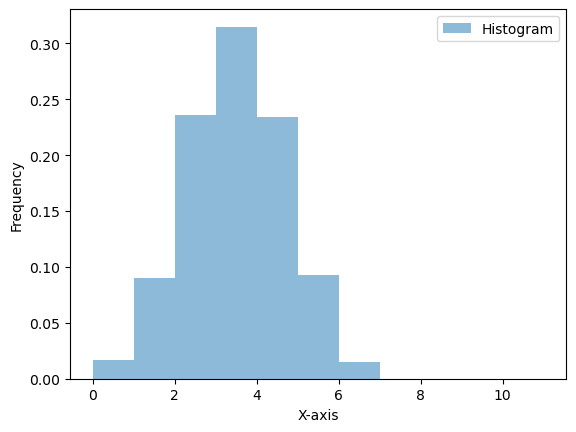

RuntimeError: Optimal parameters not found: Number of calls to function has reached maxfev = 10000.

In [ ]:
import numpy as np
from scipy.stats import binom, norm
import matplotlib.pyplot as plt

# 히스토그램 데이터 생성 (임의로 생성)
#data = np.random.binomial(n=10, p=0.3, size=1000)
data = mk1_list

# Create a histogram plot
plt.hist(data, bins=range(12), alpha=0.5, density=True, label='Histogram')
plt.xlabel('X-axis')
plt.ylabel('Frequency')
plt.legend()
plt.show()

# 이항 분포 파라미터 추정
# Define a binomial distribution function
def binomial_distribution(x, n, p):
    return binom.pmf(x, n, p)

# Fit the binomial distribution to the data
params, covariance = curve_fit(binomial_distribution, 10, data, maxfev=10000)


# Plot the histogram and the fitted binomial distribution
plt.hist(data, bins=range(12), alpha=0.5, density=True, label='Histogram')
x_values = np.arange(12)
y_values = binomial_distribution(x_values, *params)
plt.plot(x_values, y_values, 'r-', label='Fitted Binomial')
plt.xlabel('X-axis')
plt.ylabel('Probability Density')
plt.legend()
plt.show()

# Print the fitted parameters
print(f'Fitted n: {params[0]}')
print(f'Fitted p: {params[1]}')


ValueError: operands could not be broadcast together with shapes (21,) (20,) 

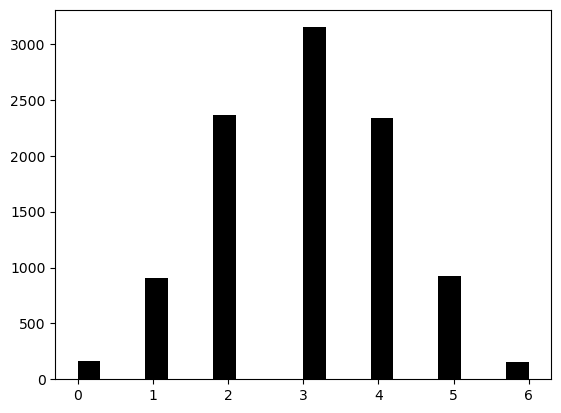

In [ ]:
from scipy.optimize import curve_fit

class gaussian:
    def __init__(self, data, bin, color, x:list, mu, sigma):
        self.data = data
        self.bin = bin
        self.color = color
        self.x = x
        self.mu = mu
        self.sigma = sigma

    def hist_data(self):
        hist = plt.hist(self.data, bins=self.bin, color=self.color)

        return hist

    def gauss(self, x, mu, sigma):
        a = 1 / (sigma*np.sqrt(2*np.pi))
        T = (x - mu) / sigma
        expo = np.exp(-(T**2)/2)
        y = a*expo
        return y
    
    def fitting(self):
        data = self.hist_data()
        x = data[1]
        y = data[0]
        opt, cov = curve_fit(self.gauss, x, y)
        x_fit = np.linspace(min(x), max(x), 1000)
        y_fit = self.gauss(x_fit, opt[0], opt[1])

        plt.figure(figsize=(16, 8))
        plt.hist(self.data, bins=self.bin, color=self.color)
        plt.plot(x_fit, y_fit, label= 'Gaussian fitting function')

        plt.title('HD67767+K-band spectral data', fontsize=15)
        plt.xlabel('wavelength', fontsize=15)
        plt.ylabel('Flux', fontsize=15)
        plt.legend(loc='lower right', fontsize=15)
        plt.show()
    
    def pt(self, color:str, bin=100):
        plt.figure()
        y = self.prob()
        plt.hist(self.data, bins=bin, color=color)
        plt.plot(self.x, y)
        plt.legend(loc='upper left')
        plt.title(f"Normal distribution( {self.mu}, {self.sigma} )")
        plt.show()

    
mk1_cal = Cal_sample_statistic(mk1_list)
mu = mk1_cal.mean()
sigma = mk1_cal.StandardDeviation()

x=np.linspace(0.0, 6.0, 500)
mk1_gaussian = gaussian(data=mk1_list, x=x, mu=mu, sigma=sigma, bin=20, color='k')
#mk1.hist(bin=20, color='k')
mk1_gaussian.fitting()




In [ ]:
print(min(mk1_list))
print(max(mk1_list))

0.0
6.0
